## Feature engineering pipeline example

In [1]:
import sys
sys.path.append('../../../')

## Load dummy binary classification dataset

In [2]:
import numpy
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [3]:
# Load data
data = load_breast_cancer(as_frame=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    data['data'], data['target'].map({0: 1, 1: 0}), test_size=0.33, random_state=42)

## Data Visualization

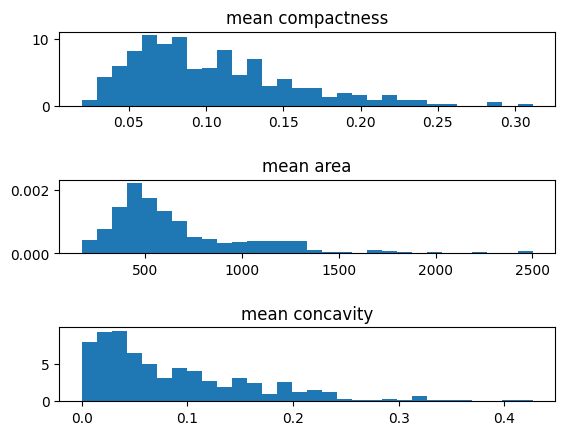

In [4]:
#Display variables distribution
fig = plt.figure()
gs = fig.add_gridspec(3, hspace=1)
axs = gs.subplots(sharex=False, sharey=False)

axs[0].hist(X_train['mean compactness'], 30, density=True)
axs[0].set_title('mean compactness')
axs[1].hist(X_train['mean area'], 30, density=True)
axs[1].set_title('mean area')
axs[2].hist(X_train['mean concavity'], 30, density=True)
axs[2].set_title('mean concavity')

plt.show()

In [5]:
# Random NA imput to test
for col in ['mean radius', 'mean texture', 'mean perimeter']:
    X_train.loc[X_train.sample(frac=0.3).index, col] = numpy.nan

In [6]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
172,15.460,11.89,NaN,736.9,0.12570,0.15550,0.20320,0.10970,0.1966,0.07069,...,18.790,17.04,125.00,1102.0,0.15310,0.35830,0.58300,0.18270,0.3216,0.10100
407,NaN,21.37,NaN,514.5,0.07551,0.08316,0.06126,0.01867,0.1580,0.06114,...,14.400,27.01,91.63,645.8,0.09402,0.19360,0.18380,0.05601,0.2488,0.08151
56,19.210,18.57,125.50,1152.0,0.10530,0.12670,0.13230,0.08994,0.1917,0.05961,...,26.140,28.14,170.10,2145.0,0.16240,0.35110,0.38790,0.20910,0.3537,0.08294
497,12.470,17.31,80.45,480.1,0.08928,0.07630,0.03609,0.02369,0.1526,0.06046,...,14.060,24.34,92.82,607.3,0.12760,0.25060,0.20280,0.10530,0.3035,0.07661
301,12.460,19.89,80.43,471.3,0.08451,0.10140,0.06830,0.03099,0.1781,0.06249,...,13.460,23.07,88.13,551.3,0.10500,0.21580,0.19040,0.07625,0.2685,0.07764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
106,11.640,NaN,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
270,NaN,NaN,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
435,13.980,NaN,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


In [7]:
# Check number of NaN values in our dataset
X_train.isna().sum()[lambda x: x > 0]

mean radius       114
mean texture      114
mean perimeter    114
dtype: int64

## Pipeline definition

In [8]:
from mlcycle.feature_engineering.outliers_dispatcher import Outliers
from mlcycle.feature_engineering.imputers_dispatcher import Imputers
from sklearn.pipeline import Pipeline

c:\Users\arfabreg\OneDrive - Capgemini\Documents\MG - Framework ML\ml-cycle\mlcyclevenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
outliers_dict = {
    1: {'features': ['mean compactness', 'mean radius'],
        'transformers': {'CustomWinsorizer': {'add_indicators':True, 'outliers_to_nan': True}
        },
        'if_optuna': False
    },
    2: {'features': ['mean area'],
        'transformers': {'LogTransformer': {'base': 'e'}
        },
        'if_optuna': False
    },
    3: {'features': ['mean concavity'],
        'transformers': {'PowerTransformer': {'exp': 0.5}
        },
        'if_optuna': False
    }
}

In [10]:
imputers_dict = {
    1: {'features': ['mean radius', 'mean texture','mean compactness'],
        'transformers': {
            'ArbitraryNumberImputer': {'arbitrary_number': 2}
        },
        'if_optuna': False
    },
    2: {'features': ['mean perimeter'],
        'transformers': {
            'KNNImputer': {'n_neighbors': 2}
        },
        'if_optuna': False
    }
}

In [11]:
Outliers(outliers_dict).run()

Pipeline(steps=[('CustomWinsorizer_1',
                 CustomWinsorizer(params={'add_indicators': True,
                                          'missing_values': 'ignore',
                                          'outliers_to_nan': True,
                                          'variables': ['mean compactness',
                                                        'mean radius']})),
                ('LogTransformer_2', LogTransformer(variables=['mean area'])),
                ('PowerTransformer_3',
                 PowerTransformer(variables=['mean concavity']))])

In [12]:
Imputers(imputers_dict).run()

Pipeline(steps=[('ArbitraryNumberImputer_1',
                 ArbitraryNumberImputer(arbitrary_number=2,
                                        variables=['mean radius',
                                                   'mean texture',
                                                   'mean compactness'])),
                ('KNNImputer_2',
                 SklearnTransformerWrapper(transformer=KNNImputer(n_neighbors=2),
                                           variables=['mean perimeter']))])

In [13]:
outliers_handler_instance = Outliers(outliers_dict).run()
impute_instance = Imputers(imputers_dict).run()

pipeline_preprocess = Pipeline(
        [
            ('outliers_handler', outliers_handler_instance),
            ('imputation', impute_instance)
        ]
)  

x_train_eval = pipeline_preprocess.fit_transform(X_train, y_train)

In [14]:
x_train_eval

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,mean compactness_right,mean radius_right
172,15.460,11.89,92.214981,6.602452,0.12570,0.15550,0.450777,0.10970,0.1966,0.07069,...,125.00,1102.0,0.15310,0.35830,0.58300,0.18270,0.3216,0.10100,0.0,0.0
407,2.000,21.37,92.214981,6.243196,0.07551,0.08316,0.247508,0.01867,0.1580,0.06114,...,91.63,645.8,0.09402,0.19360,0.18380,0.05601,0.2488,0.08151,0.0,0.0
56,19.210,18.57,125.500000,7.049255,0.10530,0.12670,0.363731,0.08994,0.1917,0.05961,...,170.10,2145.0,0.16240,0.35110,0.38790,0.20910,0.3537,0.08294,0.0,0.0
497,12.470,17.31,80.450000,6.173994,0.08928,0.07630,0.189974,0.02369,0.1526,0.06046,...,92.82,607.3,0.12760,0.25060,0.20280,0.10530,0.3035,0.07661,0.0,0.0
301,12.460,19.89,80.430000,6.155495,0.08451,0.10140,0.261343,0.03099,0.1781,0.06249,...,88.13,551.3,0.10500,0.21580,0.19040,0.07625,0.2685,0.07764,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.790000,5.497168,0.09783,0.15310,0.293360,0.02872,0.1902,0.08980,...,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840,0.0,0.0
106,11.640,2.00,75.170000,6.022236,0.11420,0.10170,0.265895,0.03485,0.1801,0.06520,...,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097,0.0,0.0
270,2.000,2.00,90.300000,6.449838,0.06429,0.02675,0.085147,0.00625,0.1508,0.05376,...,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120,0.0,0.0
435,13.980,2.00,91.120000,6.396096,0.10600,0.11330,0.335559,0.06463,0.1669,0.06544,...,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550,0.0,0.0


In [15]:
#Check of number of NaN after pipeline
x_train_eval.isna().sum()[x_train_eval.isna().sum() > 0]

Series([], dtype: int64)

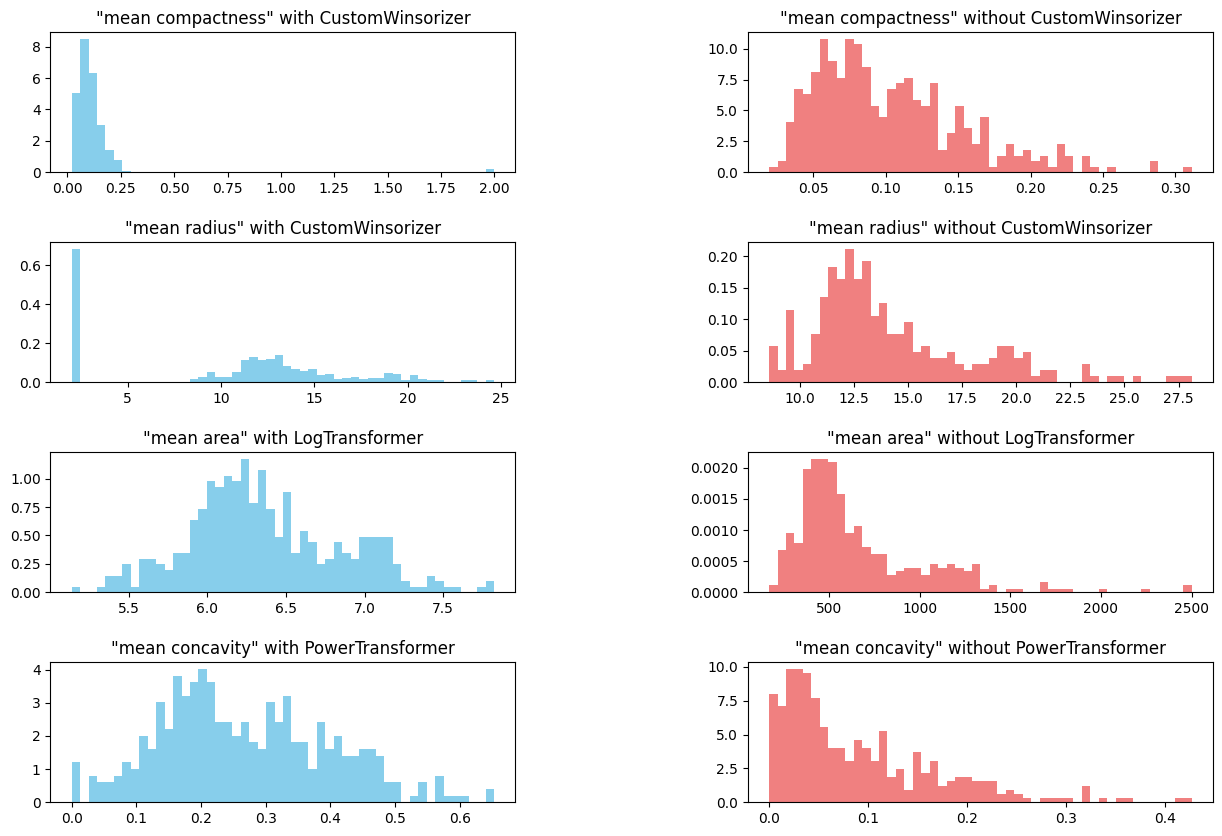

In [16]:
#Display variables distribution 

var_list = ['mean compactness', 'mean radius', 'mean area', 'mean concavity']
imputer_list = ['CustomWinsorizer', 'CustomWinsorizer', 'LogTransformer', 'PowerTransformer']
fig = plt.figure(figsize=(15,10))
gs = fig.add_gridspec(len(var_list), 2, hspace=0.5, wspace=0.5)
axs = gs.subplots(sharex=False, sharey=False)
for col,data,color,text in zip(range(0,2),[x_train_eval,X_train],['skyblue','lightcoral'], ['with', 'without']):
    for row in range(0,len(var_list)):
        axs[row,col].hist(data[var_list[row]], 50, density=True, color = color)
        axs[row,col].set_title(f'"{var_list[row]}" {text} {imputer_list[row]}')